In [1]:
### available GPU
!nvidia-smi

Mon Oct 30 10:46:47 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
### installing required libraries
!pip install super-gradients==3.1.0
!pip install imutils
!pip install roboflow
!pip install pytube --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 13.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.5/684.5 kB 50.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 79.6 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.6/408.6 kB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 91.8 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 78.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
## importing required libraries
import os
import shutil
import random

!pip install tqdm --upgrade
from tqdm.notebook import tqdm

# Train-Test Data Preparation:

In [ ]:
# ## connecting to the google drive

# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
### specifying data path

train_path_img = "/kaggle/input/sixray/train/images/"
train_path_label = "/kaggle/input/sixray/train/labels/"
val_path_img = "/kaggle/input/sixray/valid/images/"
val_path_label = "/kaggle/input/sixray/valid/labels/"
test_path = "/kaggle/input/sixray/test/images/"
test_path_label = "/kaggle/input/sixray/test/labels/"

In [ ]:
# '''
# Split the dataset into train and test and creates the train.txt and test.tx with
# the respective path of the images in each folder
# '''

# def train_test_split(path,neg_path=None, split = 0.2):
#     print("------ PROCESS STARTED -------")


#     files = list(set([name[:-4] for name in os.listdir(path)])) ## removing duplicate names i.e. counting only number of images
    

#     print (f"--- This folder has a total number of {len(files)} images---")
#     random.seed(42)
#     random.shuffle(files)

#     test_size = int(len(files) * split)
#     train_size = len(files) - test_size

#     ## creating required directories

#     os.makedirs(train_path_img, exist_ok = True)
#     os.makedirs(train_path_label, exist_ok = True)
#     os.makedirs(val_path_img, exist_ok = True)
#     os.makedirs(val_path_label, exist_ok = True)

    
#     ### ----------- copying images to train folder
#     for filex in tqdm(files[:train_size]):
#       if filex == 'classes':
#           continue
#       shutil.copy2(path + filex + '.jpg',f"{train_path_img}/" + filex + '.jpg' )
#       shutil.copy2(path + filex + '.txt', f"{train_path_label}/" + filex + '.txt')
        
    

#     print(f"------ Training data created with 80% split {len(files[:train_size])} images -------")
    
#     if neg_path:
#         neg_images = list(set([name[:-4] for name in os.listdir(neg_path)])) ## removing duplicate names i.e. counting only number of images
#         for filex in tqdm(neg_images):
#             shutil.copy2(neg_path+filex+ ".jpg", f"{train_path_img}/" + filex + '.jpg')
            
#         print(f"------ Total  {len(neg_images)} negative images added to the training data -------")
    
#         print(f"------ TOTAL Training data created with {len(files[:train_size]) + len(neg_images)} images -------")
    


#     ### copytin images to validation folder
#     for filex in tqdm(files[train_size:]):
#       if filex == 'classes':
#           continue
#       # print("running")
#       shutil.copy2(path + filex + '.jpg', f"{val_path_img}/" + filex + '.jpg' )
#       shutil.copy2(path + filex + '.txt', f"{val_path_label}/" + filex + '.txt')

#     print(f"------ Testing data created with a total of {len(files[train_size:])} images ----------")
    
#     print("------ TASK COMPLETED -------")

# ## spliting the data into train-test and creating train.txt and test.txt files
# # train_test_split('/content/drive/MyDrive/custom_notebooks/yolo_data/')

# ### for label_tag
# train_test_split('/content/drive/MyDrive/yolo_nas/data/') ### without negative images
# # train_test_split('./data/','./negative_images/') ### if you want to feed negative images

#  Datasets and DataLoaders


In [5]:
pip install super_gradients

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 46.3 MB/s eta 0:00:0000:0100:01
  Using cached coverage-5.3.1-cp310-cp310-linux_x86_64.whl
  Using cached Sphinx-4.0.3-py3-none-any.whl (2.9 MB)
  Using cached torchmetrics-0.8.0-py3-none-any.whl (408 kB)
  Using cached hydra_core-1.3.2-py3-none-any.whl (154 kB)
  Using cached omegaconf-2.3.0-py3-none-any.whl (79 kB)
  Using cached onnxruntime-1.13.1-cp310-cp310-manylinux_2_27_x86_64.whl (4.5 MB)
  Using cached onnx-1.13.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
  Using cached pip_tools-7.3.0-py3-none-any.whl (57 kB)
  Using cached pyparsing-2.4.5-py2.py3-none-any.whl (67 kB)
  Using cached einops-0.3.2-py3-none-any.whl (25 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached treelib-1.6.1-py3-none-any.whl
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached stringcase-1.2.0-py3-none-any.whl


In [6]:
from super_gradients.training import dataloaders
from super_gradients.training.dataloaders.dataloaders import coco_detection_yolo_format_train, coco_detection_yolo_format_val



dataset_params = {
    'data_dir':'/kaggle/input/sixray',
    'train_images_dir':'train/images',
    'train_labels_dir':'train/labels',
    'val_images_dir':'valid/images',
    'val_labels_dir':'valid/labels',
    'test_images_dir':'/kaggle/input/sixray/test/images',
    'test_labels_dir':'/kaggle/input/sixray/test/labels',
    'classes': ['Gun', 'Knife', 'Pliers', 'Scissors', 'Wrench']    
}

[2023-10-30 10:50:27] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it


The console stream is logged into /root/sg_logs/console.log


[2023-10-30 10:50:27] WARNING - __init__.py - Failed to import pytorch_quantization
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[2023-10-30 10:50:36] INFO - utils.py - NumExpr defaulting to 4 threads.
[2023-10-30 10:50:39] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-10-30 10:50:39] WARNING - export.py - Failed to import pytorch_quantization
[2023-10-30 10:50:39] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2023-10-30 10:50:39] WARNING - env_sanity_check.py - Failed to verify installed packages: coverage required but not found
[2023-10-30 10:50:39] WARNING - env_sanity_check.py - Failed to verify installed packages: sphinx required but not found
[2023-10-30 10:50:39] WARNING - env_sanity_check.py - Failed to verify instal

### Model parameters:

`ckpt_root_dir` - this is the directory where results from all your experiments will be saved

`experiment_name` - all checkpoints, logs, and tensorboards will be saved in a directory with the name you specify here.

In [7]:
import torch

MODEL_ARCH = 'yolo_nas_l'
DEVICE = 'cuda' if torch.cuda.is_available() else "cpu"
BATCH_SIZE = 4
MAX_EPOCHS = 45
CHECKPOINT_DIR = f'/kaggle/working/'
EXPERIMENT_NAME = f'yolo_nas'

You pass the values for `dataset_params` into the `dataset_params` argument as shown below.

In [8]:
### setting up dataloaders
train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)

[2023-10-30 10:50:40] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 5819/5819 [00:48<00:00, 119.66it/s]
[2023-10-30 10:51:29] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 1662/1662 [00:11<00:00, 142.64it/s]
[2023-10-30 10:51:41] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations:  98%|█████████▊| 813/831 [00:04<00:00, 161.27it/s]

### 🧐 Now inspect the dataset defined earlier. 

SuperGradients added `transforms` for you. You're free to experiment with these transformations as you please. You can also add in your own transformations from `torchvision.transforms`, `albumentations` or a custom tranformaton.

In [9]:
### applying custom transformations
train_data.dataset.transforms

[DetectionMosaic('additional_samples_count': 3, 'non_empty_targets': False, 'prob': 1.0, 'input_dim': (640, 640), 'enable_mosaic': True, 'border_value': 114),
 DetectionRandomAffine('additional_samples_count': 0, 'non_empty_targets': False, 'degrees': 10.0, 'translate': 0.1, 'scale': [0.1, 2], 'shear': 2.0, 'target_size': (640, 640), 'enable': True, 'filter_box_candidates': True, 'wh_thr': 2, 'ar_thr': 20, 'area_thr': 0.1, 'border_value': 114),
 DetectionMixup('additional_samples_count': 1, 'non_empty_targets': True, 'input_dim': (640, 640), 'mixup_scale': [0.5, 1.5], 'prob': 1.0, 'enable_mixup': True, 'flip_prob': 0.5, 'border_value': 114),
 DetectionHSV('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 1.0, 'hgain': 5, 'sgain': 30, 'vgain': 30, 'bgr_channels': (0, 1, 2), '_additional_channels_warned': False),
 DetectionHorizontalFlip('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 0.5),
 DetectionPaddedRescale('additional_samples_count': 0, 'non_em

Indexing dataset annotations: 100%|██████████| 831/831 [00:04<00:00, 176.74it/s]


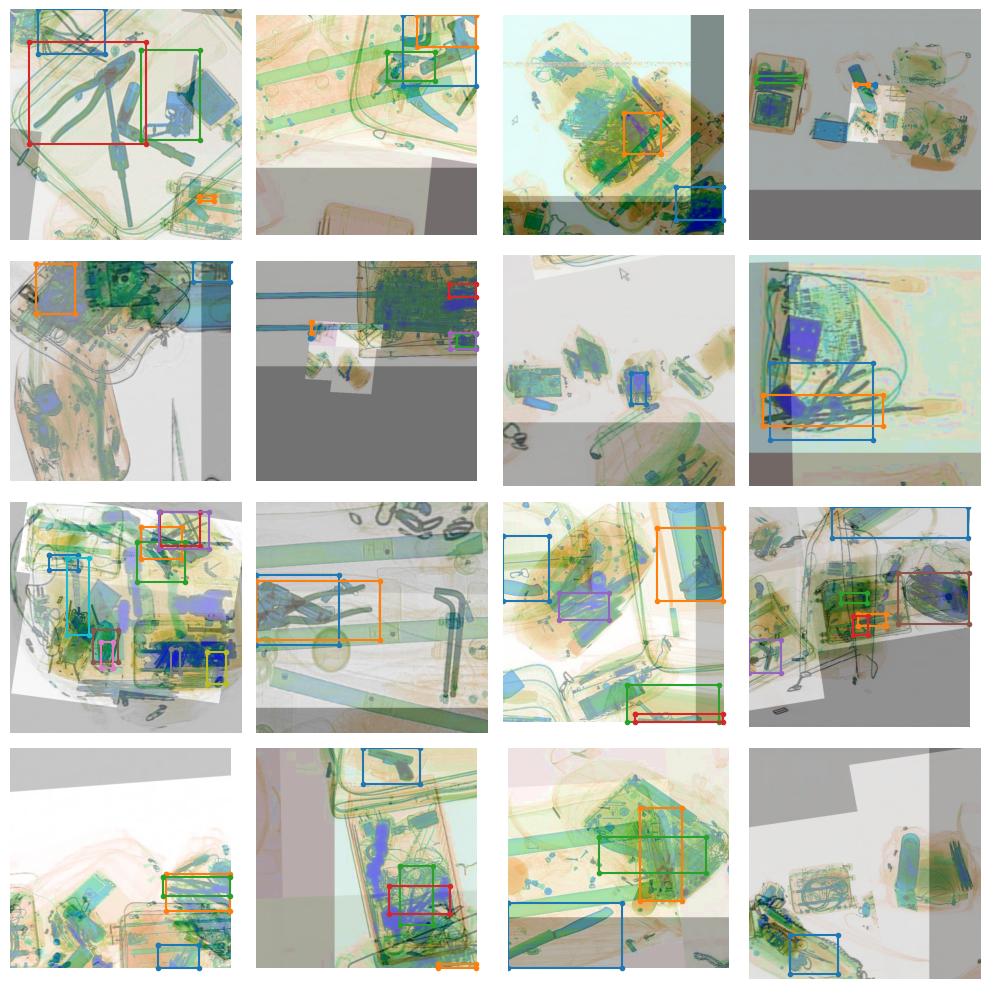

In [10]:
### visualizing data after transformation
train_data.dataset.plot()

#  Instantiating the model



In [12]:
from super_gradients.training import models

model = models.get(
    MODEL_ARCH, 
    num_classes=len(dataset_params['classes']), 
    pretrained_weights="coco"
)

[2023-10-30 10:52:54] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_l_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_l_coco.pth
100%|██████████| 256M/256M [00:15<00:00, 17.3MB/s]   
[2023-10-30 10:53:11] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l


In [ ]:
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback

train_params = {
    'silent_mode': False,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    "max_epochs": MAX_EPOCHS,
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}

# Training the model



In [ ]:
from super_gradients.training import Trainer

trainer = Trainer(experiment_name=EXPERIMENT_NAME, ckpt_root_dir=CHECKPOINT_DIR)

In [ ]:
trainer.train(model=model, 
              training_params=train_params, 
              train_loader=train_data, 
              valid_loader=val_data)

In [13]:
best_model = models.get(
    MODEL_ARCH,
    num_classes=len(dataset_params['classes']),
    checkpoint_path=f"/kaggle/working/yolo_nas/RUN_20231015_162410_973994/average_model.pth"
#     checkpoint_path=f"{CHECKPOINT_DIR}/{EXPERIMENT_NAME}/average_model.pth"
).to(DEVICE)

FileNotFoundError: Incorrect Checkpoint path: /kaggle/working/yolo_nas/RUN_20231015_162410_973994/average_model.pth (This should be an absolute path)

# Evaluating the best trained model on the test set

In [ ]:
trainer.test(model=best_model,
            test_loader=test_data,
            test_metrics_list=DetectionMetrics_050(score_thres=0.1, 
                                                   top_k_predictions=300, 
                                                   num_cls=len(dataset_params['classes']), 
                                                   normalize_targets=True, 
                                                   post_prediction_callback=PPYoloEPostPredictionCallback(score_threshold=0.01, 
                                                                                                          nms_top_k=1000, 
                                                                                                          max_predictions=300,                                                                              
                                                                                                          nms_threshold=0.7)
                                                  ))

### Inference on single image:

In [ ]:
img_dir = "/kaggle/input/sixray/test/images/P00031_jpg.rf.0d7a659d4f2537c5274aaeb7b3b768b0.jpg"
best_model.predict(img_dir).show()

# Inference and visualization with trained model:

### supervision



1.  Documnetation: https://roboflow.github.io/supervision/
2.  PIP: https://pypi.org/project/supervision/#description




In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install supervision ### library to visualize and compare results with annotations

In [ ]:
import supervision as sv

### creating dataloader for test images
ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"/kaggle/input/sixray/test/images",
    annotations_directory_path=f"/kaggle/input/sixray/test/labels",
    data_yaml_path=f"/kaggle/input/sixray/data.yaml",
    force_masks=False
)

In [ ]:
CONFIDENCE_TRESHOLD = 0.5 ### setting up confidence value

predictions = {} ### prediction dictionary

for image_name, image in tqdm(ds.images.items()):
    result = list(best_model.predict(image, conf=CONFIDENCE_TRESHOLD))[0]
    detections = sv.Detections(
        xyxy=result.prediction.bboxes_xyxy,
        confidence=result.prediction.confidence,
        class_id=result.prediction.labels.astype(int)
    )
    predictions[image_name] = detections

In [ ]:
import random
random.seed(20)

MAX_IMAGE_COUNT = 5 ### number of images to be shown

n = min(MAX_IMAGE_COUNT, len(ds.images))

keys = list(ds.images.keys())
keys = random.sample(keys, n) ### randomly picking images

box_annotator = sv.BoxAnnotator() ### bbox annotator

images = []
titles = []

for key in keys:
    frame_with_annotations = box_annotator.annotate(
        scene=ds.images[key].copy(),
        detections=ds.annotations[key],
        skip_label=True
    )
    images.append(frame_with_annotations)
    titles.append('annotations')
    frame_with_predictions = box_annotator.annotate(
        scene=ds.images[key].copy(),
        detections=predictions[key],
        skip_label=True
    )
    images.append(frame_with_predictions)
    titles.append('predictions')

### plotting images with annotations and prediction values
%matplotlib inline
sv.plot_images_grid(images=images, titles=titles, grid_size=(n, 2), size=(2 * 4, n * 4))